# Image Recogniton Model
We will be using ResNet50 -a pretrained model in Keras-to carry out image recognition
<br>You can also use your own images or some from ImageNet
**ImageNet** is a giant data set of millions of labeled images that can be used to train neural networks

In [ ]:
import numpy as np
from keras.preprocessing import image
from keras.applications import resnet50

### Load Model and Image

In [ ]:
# Load Keras' ResNet50 model that was pre-trained against the ImageNet database
model = resnet50.ResNet50()

### Load and Resize Image
The original size of the image is 1365 pixels square which is too large for our model. The size of the image to must match the number of input nodes in the NN. We will thus resize it to the required size of 224x224 pixels for our ResNet model.<br>Using low resolution images in NN is common because it helps improve the processing speed by limiting the number of nodes you need in the NN which makes the models more practical and faster to train.

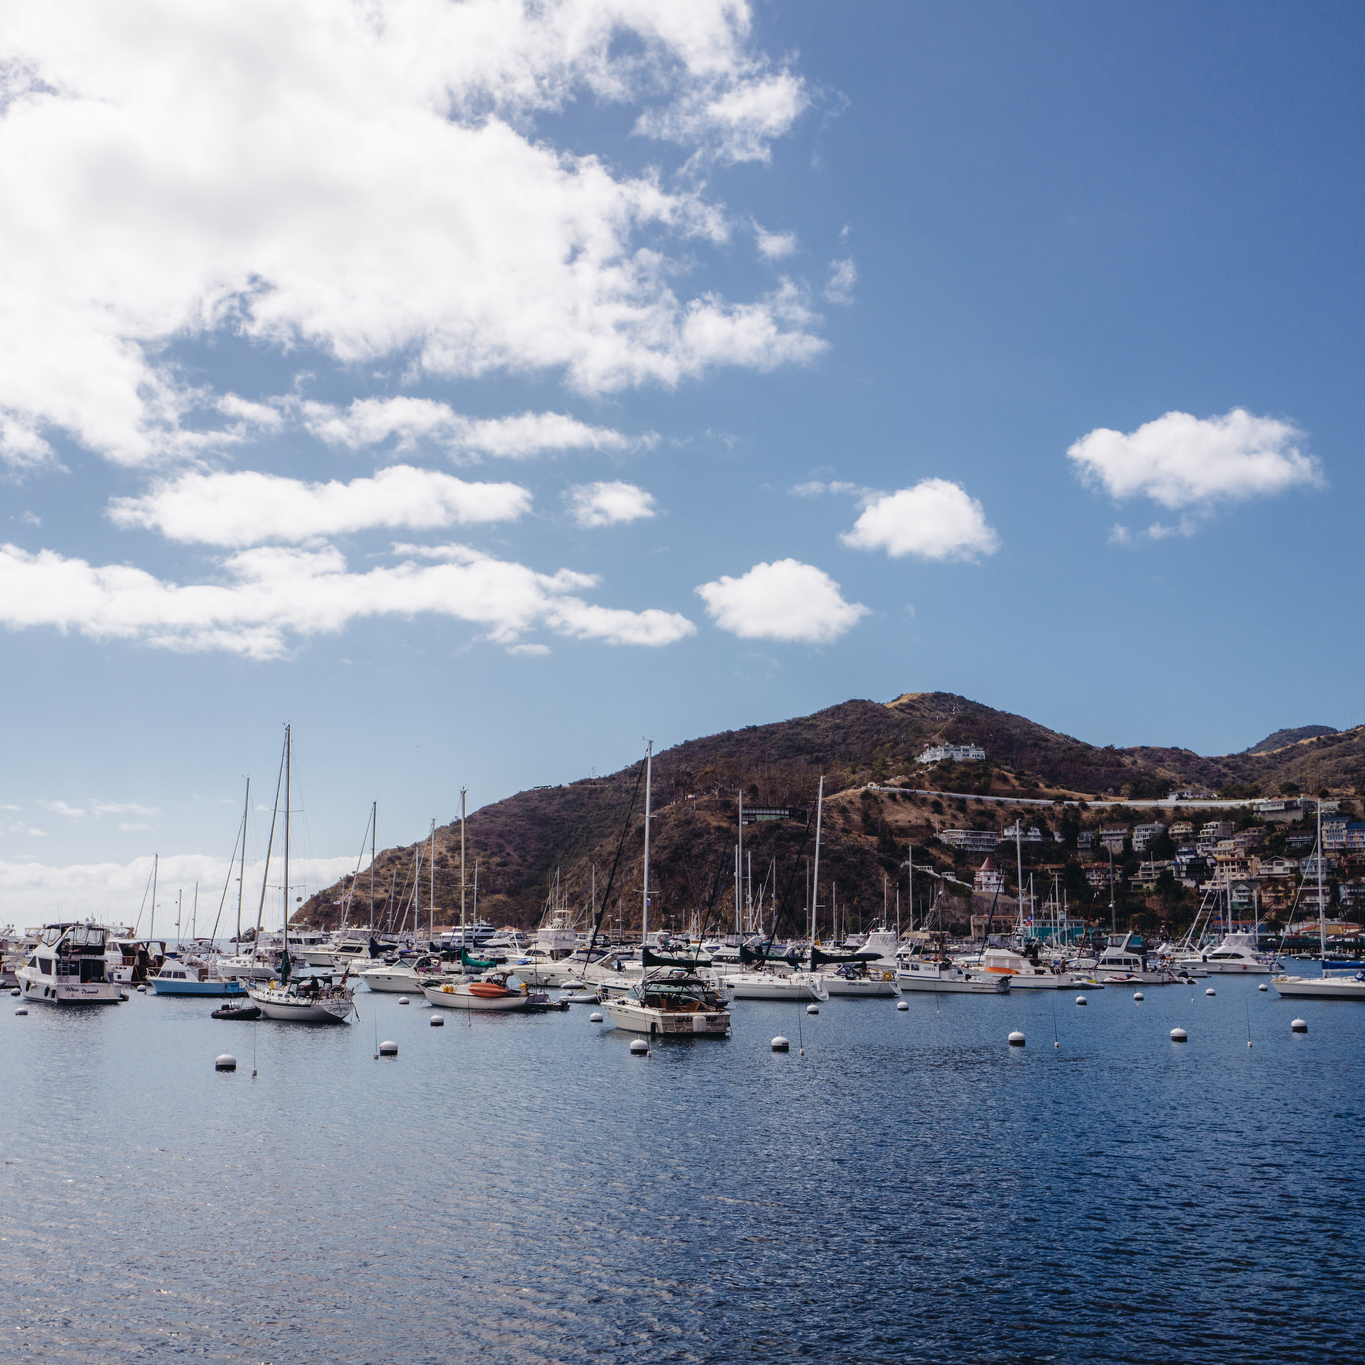

In [1]:
#To Display image we are processing
from IPython.display import Image
Image(filename="bay.jpg")

In [ ]:
# Load the image file, resizing it to 224x224 pixels (required by this model)
img = image.load_img("bay.jpg", target_size=(224, 224))

### Converting Image
Convert image into a three-dimensional array.
<br>The first two dimensions are height and width 224x224
<br>The third dimension is color. Our array is 3 layers deep with each layer reprenting the red, blue and green intensity
<br><br>The NN expects us to pass in array and multiple images at one. However, in our case we have only have one image. Therefore we will add a fourth dimension to our array-this allows us to change a single image into an array of multiple images with just one element

In [ ]:
# Convert the image to a numpy array
x = image.img_to_array(img)

# Add a forth dimension since Keras expects a list of images
#we expand only on the first axis
x = np.expand_dims(x, axis=0)

### Scale Data and Run Model
Images in a computer represent red, green and blue values of each pixel as one byte. Each value can range from 0 to 255. <br>Thus we normalize the data by using the preprocess_input method

In [ ]:
# Scale the input image to the range used in the trained network
x = resnet50.preprocess_input(x)

# Run the image through the deep neural network to make a prediction
#It returns a 1000 element array of floating point numbers
predictions = model.predict(x)

# Look up the names of the predicted classes. Index zero is the results for the first image.
#top=9 gives the top 9 likely matches of classes
predicted_classes = resnet50.decode_predictions(predictions, top=9)

print("This is an image of:")

for imagenet_id, name, likelihood in predicted_classes[0]:
    print(" - {}: {:2f} likelihood".format(name, likelihood))